In [1]:
import pandas as pd
import sklearn as sk
from prophet import Prophet
from  pandas import to_datetime
import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#pip install prophet

In [3]:
data = pd.read_csv("M0424_2562_RMF.csv")

In [4]:
df = data[["nav_date","last_val"]]

In [5]:
num = [3, 7, 14, 21, 30]

In [6]:
df['nav_date'] = pd.to_datetime(df['nav_date'])

C:\Users\taro\AppData\Local\Temp\ipykernel_15968\2428392750.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['nav_date'] = pd.to_datetime(df['nav_date'])


In [7]:
df.head()

,nav_date,last_val
0,2019-09-11,9.9669
1,2019-09-12,9.9233
2,2019-09-13,9.9754
3,2019-09-16,9.9887
4,2019-09-17,10.0096


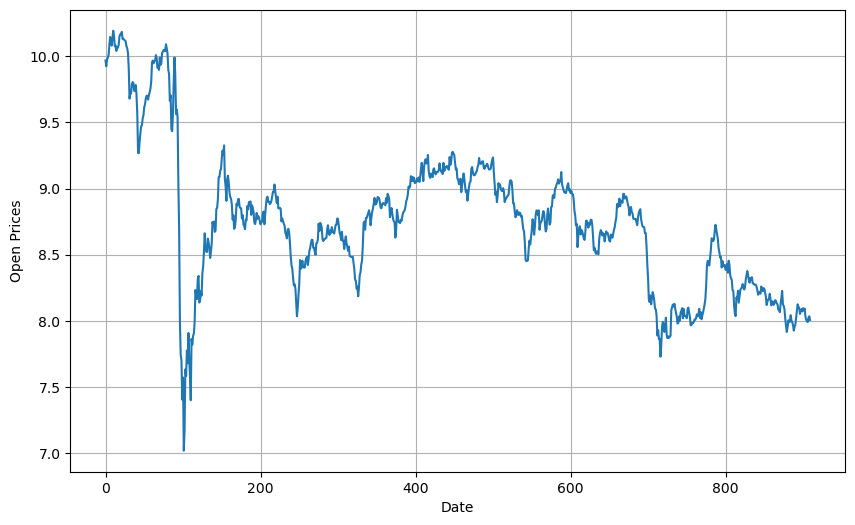

In [8]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Open Prices')
plt.plot(df["last_val"])
plt.show()

In [9]:
df.columns = ['ds', 'y']
df['ds']= to_datetime(df['ds'])

C:\Users\taro\AppData\Local\Temp\ipykernel_15968\4212465127.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ds']= to_datetime(df['ds'])


In [10]:
for idx, j in enumerate(num):
    train_size = int(len(df)-j)
    test_size = len(df) - train_size
    train_data = df.iloc[:-j]
    test_data = df.iloc[-j:]
    scaler = MinMaxScaler(feature_range = (0,1))
    train_scaled = scaler.fit_transform(train_data["y"].values.reshape(-1,1))
    train_data["y"] = train_scaled
    m = Prophet(changepoint_prior_scale=0.5,seasonality_prior_scale=0.5)
    m.fit(train_data)
    future = m.make_future_dataframe(periods=j)
    forecast = m.predict(future)
    forecast_in = scaler.inverse_transform(forecast[['yhat']])
    forecast_in1 = pd.DataFrame()
    forecast_in1["yhat"] = pd.DataFrame(forecast_in)
    MSE_error = mean_squared_error(test_data["y"], forecast_in1["yhat"][-j:])
    print('Testing Mean Squared Error is {}'.format(MSE_error))

C:\Users\taro\AppData\Local\Temp\ipykernel_15968\2649719663.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data["y"] = train_scaled
00:59:34 - cmdstanpy - INFO - Chain [1] start processing
00:59:34 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\taro\AppData\Local\Temp\ipykernel_15968\2649719663.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data["y"] = train_scaled
00:59:34 - cmdstanpy - INFO - Chain [1] start processing


Testing Mean Squared Error is 0.0014726702052651074


00:59:35 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\taro\AppData\Local\Temp\ipykernel_15968\2649719663.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data["y"] = train_scaled
00:59:35 - cmdstanpy - INFO - Chain [1] start processing


Testing Mean Squared Error is 0.0065426984286822


00:59:36 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\taro\AppData\Local\Temp\ipykernel_15968\2649719663.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data["y"] = train_scaled
00:59:36 - cmdstanpy - INFO - Chain [1] start processing


Testing Mean Squared Error is 0.0021610907011832517


00:59:36 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\taro\AppData\Local\Temp\ipykernel_15968\2649719663.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data["y"] = train_scaled
00:59:37 - cmdstanpy - INFO - Chain [1] start processing


Testing Mean Squared Error is 0.010405322563018642


00:59:37 - cmdstanpy - INFO - Chain [1] done processing


Testing Mean Squared Error is 0.01112644958494944


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 910 entries, 0 to 909
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      910 non-null    datetime64[ns]
 1   y       910 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 14.3 KB
